In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#relative_path = "data_files\\df_final_demo.txt"

df_demo = pd.read_csv(r"..\..\data_files\raw\df_final_demo.txt")
df_exp = pd.read_csv(r"..\..\data_files\raw\df_final_experiment_clients.txt")
df_web_1 = pd.read_csv(r"..\..\data_files\raw\df_final_web_data_pt_1.txt")
df_web_2 = pd.read_csv(r"..\..\data_files\raw\df_final_web_data_pt_2.txt")

In [3]:
#concat df_web
df_web = pd.concat([df_web_1,df_web_2])
df_web.shape[0] == df_web_1.shape[0] + df_web_2.shape[0] # concatenated all rows

True

In [4]:
# drop na since it means they did not participate on the test
df_exp.dropna(inplace=True)
df_exp

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [5]:
df_exp.info() # ok

<class 'pandas.core.frame.DataFrame'>
Index: 50500 entries, 0 to 50499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  50500 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [6]:
df_demo.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0


In [7]:
df_demo.duplicated().sum() # no dups

0

In [8]:
df_demo.isnull().sum() # has nulls

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [9]:
# drop where there is more than 2 columns with null values
df_demo = df_demo.dropna(thresh=3)

# fill row that its missing age with mean value
clnt_age_mean = df_demo['clnt_age'].mean()
df_demo['clnt_age'].fillna(clnt_age_mean,inplace=True)
df_demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [10]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70595 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70595 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70595 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.4+ MB


In [11]:
df_exp.duplicated().sum()

0

In [12]:
df_exp.isnull().sum()

client_id    0
Variation    0
dtype: int64

In [13]:
df_web_1.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [14]:
df_web_2.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
5,6019349,442094451_91531546617,154620534_35331068705_522317,start,2017-06-01 11:57:54
6,4726500,934350987_45569789638,467318052_88159801968_565608,confirm,2017-06-05 17:38:52
7,4726500,934350987_45569789638,467318052_88159801968_565608,step_3,2017-06-05 17:38:33
8,4726500,934350987_45569789638,467318052_88159801968_565608,step_2,2017-06-05 17:37:31
9,4726500,934350987_45569789638,467318052_88159801968_565608,step_1,2017-06-05 17:37:24


In [15]:
df_web_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB


In [16]:
df_web_2.info() # same as df_web_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


In [17]:
df_web.head() # client_id appears multiple times

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [18]:
df_web.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [19]:
# df_web and df_demo merged by cle
df_merged = pd.merge(left = df_web, right =df_demo, on = 'client_id') # If we 

In [20]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [21]:
df_demo.describe()
# avg age is 46.44 eith std of 15. Middle age mainly

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059500e+04,70595.000000,70595.000000,70595.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.005021e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877269e+06,6.871819,82.089854,15.591162,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519604e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016969e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483064e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [22]:
df_demo['clnt_age'].median()
# median of age is 47

47.0

In [23]:
df_demo.groupby('clnt_age')['gendr'].value_counts()

clnt_age  gendr
13.5      U         1
14.0      F         1
          U         1
14.5      U        16
          M         4
                   ..
94.0      U         3
94.5      U         1
95.5      F         1
96.0      M         1
          U         1
Name: count, Length: 485, dtype: int64

In [24]:
df_demo['gendr'].value_counts() # Undetermined leads

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [25]:
df_online = pd.merge(df_demo,df_exp,how='left',on='client_id')

In [26]:
df_exp.isnull().sum()

client_id    0
Variation    0
dtype: int64

In [27]:
df_online.dropna(inplace=True)

In [28]:
df_online.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
Variation           0
dtype: int64

In [29]:
df_online.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [30]:
df_online.describe(include='object') # categorical variables

,gendr,Variation
count,50488,50488
unique,4,2
top,U,Test
freq,17280,26961


In [31]:
df_online['Variation'].value_counts()

Variation
Test       26961
Control    23527
Name: count, dtype: int64

In [32]:
df_online.describe() # numerical variables

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.048800e+04,50488.000000,50488.000000,50488.000000,50488.000000,5.048800e+04,50488.000000,50488.000000
mean,5.006173e+06,12.031730,150.415485,47.319778,2.254575,1.495147e+05,3.093289,6.131873
std,2.877417e+06,6.860282,81.944830,15.518463,0.533671,3.020364e+05,2.187991,2.175423
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.515700e+06,6.000000,82.000000,33.500000,2.000000,3.987841e+04,1.000000,4.000000
50%,5.025026e+06,11.000000,136.000000,48.000000,2.000000,6.573360e+04,3.000000,6.000000
75%,7.477918e+06,16.000000,192.000000,59.500000,2.000000,1.399565e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [33]:
df_demo.shape

(70595, 9)

In [34]:
df_online['client_id'].value_counts()

client_id
836976     1
9036797    1
9512025    1
7474303    1
7468048    1
          ..
2428657    1
9776532    1
7875730    1
4921377    1
7468138    1
Name: count, Length: 50488, dtype: int64

In [35]:
df_demo['client_id'].value_counts()

client_id
836976     1
2249663    1
2405235    1
68116      1
2709822    1
          ..
7081601    1
1941269    1
245270     1
7795711    1
5602139    1
Name: count, Length: 70595, dtype: int64

In [36]:
df_demo['client_id'].nunique()

70595

In [37]:
df_demo['client_id'].value_counts()

client_id
836976     1
2249663    1
2405235    1
68116      1
2709822    1
          ..
7081601    1
1941269    1
245270     1
7795711    1
5602139    1
Name: count, Length: 70595, dtype: int64

In [38]:
df_web.head(10) # KPI - validar quien llego al ultimo paso

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [39]:
df_web.groupby('client_id')['process_step'].count()

client_id
169         5
336         2
546         5
555         5
647         5
           ..
9999729    11
9999768    12
9999832     2
9999839     6
9999875     6
Name: process_step, Length: 120157, dtype: int64

In [40]:
df_web['process_step'].nunique()

5

In [41]:
# coompletion rate - The proportion of users who reach the final ‘confirm’ step.
confirm_count = df_web['process_step'].value_counts()['confirm']

In [42]:
confirm_count = df_web[df_web['process_step'] == 'confirm']['visit_id'].nunique()
confirm_count

89826

In [43]:
df_web[df_web['process_step'] != 'confirm']['visit_id'].nunique()

147861

In [44]:
total_visits_count = df_web['visit_id'].nunique()

In [45]:
df_web['visit_id'].count()

755405

In [46]:
#mask = df_web['Variation']=='Test'
#df_test = df_web.loc[mask]
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [47]:
df_web.head(30)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [48]:
df_web['date_time'].value_counts()

date_time
2017-05-02 10:07:41    24
2017-05-02 10:08:31    24
2017-05-02 10:53:01    24
2017-05-02 10:17:46    16
2017-05-02 10:24:34    16
                       ..
2017-04-22 13:47:12     1
2017-04-22 13:48:55     1
2017-04-14 16:55:06     1
2017-04-14 16:56:46     1
2017-06-03 12:17:09     1
Name: count, Length: 629363, dtype: int64

In [49]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.6+ MB


In [50]:
from datetime import timedelta
year = timedelta(days=365)
another_year = timedelta(weeks=40, days=84, hours=23,
                         minutes=50, seconds=600)

In [51]:
# check if date is between 3/15/2017 to 6/20/2017 to make sure that theyy are poart the the experiment
# pd.to_datetime()
# strftime('%Y-%m-%d %H:%M:%S')

In [52]:
df_web['date_time'].value_counts()

date_time
2017-05-02 10:07:41    24
2017-05-02 10:08:31    24
2017-05-02 10:53:01    24
2017-05-02 10:17:46    16
2017-05-02 10:24:34    16
                       ..
2017-04-22 13:47:12     1
2017-04-22 13:48:55     1
2017-04-14 16:55:06     1
2017-04-14 16:56:46     1
2017-06-03 12:17:09     1
Name: count, Length: 629363, dtype: int64

In [53]:
df_web['date_time'].str.split()

0         [2017-04-17, 15:27:07]
1         [2017-04-17, 15:26:51]
2         [2017-04-17, 15:19:22]
3         [2017-04-17, 15:19:13]
4         [2017-04-17, 15:18:04]
                   ...          
412259    [2017-05-24, 18:46:10]
412260    [2017-05-24, 18:45:29]
412261    [2017-05-24, 18:44:51]
412262    [2017-05-24, 18:44:34]
412263    [2017-06-03, 12:17:09]
Name: date_time, Length: 755405, dtype: object

In [54]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [55]:
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [56]:
df_online

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50483,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50484,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50485,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50486,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [57]:
df_ab = pd.merge(df_online,df_web)

In [58]:
df_online.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test


In [59]:
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [60]:
df_ab.head(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
5,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_1,2017-04-02 11:21:38
6,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
7,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
8,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40
9,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 10:59:43


In [61]:
mask = df_ab['Variation']=='Test'
df_test = df_ab.loc[mask]
df_control = df_ab.loc[~mask]
df_control.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
11,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
12,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
13,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
14,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
15,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25
16,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:02:21
23,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,432077852_35036160885,942996157_39527225999_589383,start,2017-06-14 14:22:31
24,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control,875448077_54387937735,717519432_65547872352_613051,confirm,2017-03-29 14:00:45
25,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control,875448077_54387937735,717519432_65547872352_613051,step_3,2017-03-29 13:59:42
26,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control,875448077_54387937735,717519432_65547872352_613051,step_2,2017-03-29 13:58:56


In [62]:
# coompletion rate fro Test - The proportion of users who reach the final ‘confirm’ step. Using client_id since its
# the unique id of the client
confirm_step_count = df_test[df_test['process_step'] == 'confirm']['client_id'].nunique()
total_users = df_test['client_id'].nunique()
completion_rate = confirm_step_count / total_users
print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 69.29%


In [63]:
confirm_step_count_ctl = df_control[df_control['process_step'] == 'confirm']['client_id'].nunique()
total_users_ctl = df_control['client_id'].nunique()
completion_rate_ctl = confirm_step_count_ctl / total_users_ctl
print(f"Completion Rate: {completion_rate_ctl:.2%}")

Completion Rate: 65.58%


In [64]:
confirm_step_count

18682

In [65]:
# transform column to time column
# group by user, order by date. 
df_test.groupby('client_id')['date_time'].shift(1).isna().sum()

26961

In [66]:
#df['shift'] = df_test.groupby('client_id')['date_time'].shift(1)
#df['diff'] = df['datetime'] - df['shift']
df_ab = df_ab.sort_values(['client_id','date_time'])
df_ab.head(20)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
255408,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56
255407,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03
255406,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35
255405,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14
255404,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34
9749,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35
9747,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53
9746,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02
9745,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45


In [67]:
#df_ab['date_time'] = df_ab['date_time'].apply(lambda x: pd.to_datetime(x))
#df_ab.dtypes
df_ab['date_time'] = pd.to_datetime(df_ab['date_time'])


In [68]:
# transform colunm to datetime 
# order by client and date
# and then shift with diferrence for new column
#df_ab = df_ab.sort_values(['client_id','date_time'], key=lambda x: pd.to_datetime(x))
df_ab['first_time']= df_ab.groupby('client_id')['date_time'].shift(1)
df_ab.dtypes

client_id                    int64
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
Variation                   object
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
first_time          datetime64[ns]
dtype: object

In [69]:
df_ab = df_ab.sort_values(['client_id','date_time'], key=lambda x: pd.to_datetime(x))
df_ab.dtypes

client_id                    int64
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
Variation                   object
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
first_time          datetime64[ns]
dtype: object

In [70]:
df_ab.head(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,first_time
255408,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,NaT
255407,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15 12:57:56
255406,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15 12:58:03
255405,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15 12:58:35
255404,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,2017-04-15 13:00:14
9749,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,NaT
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12 15:41:28
9747,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,2017-04-12 15:41:35
9746,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,2017-04-12 15:41:53
9745,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45,2017-04-12 15:45:02


In [71]:
 df_ab['diff'] = df_ab['date_time'] - df_ab['first_time']

In [72]:
df_ab.head(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,first_time,diff
255408,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,NaT,NaT
255407,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15 12:57:56,0 days 00:00:07
255406,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15 12:58:03,0 days 00:00:32
255405,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15 12:58:35,0 days 00:01:39
255404,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,2017-04-15 13:00:14,0 days 00:00:20
9749,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,NaT,NaT
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12 15:41:28,0 days 00:00:07
9747,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,2017-04-12 15:41:35,0 days 00:00:18
9746,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,2017-04-12 15:41:53,0 days 00:03:09
9745,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45,2017-04-12 15:45:02,0 days 00:02:43


In [73]:
df_ab.groupby('process_step')['diff'].mean()

process_step
confirm   1 days 00:40:48.170193941
start     3 days 15:03:36.993693593
step_1    0 days 00:25:56.563424249
step_2    0 days 00:01:18.518814981
step_3    0 days 00:11:02.429579202
Name: diff, dtype: timedelta64[ns]

In [74]:
mask = df_ab['Variation']=='Test'
df_test = df_ab.loc[mask]
df_control = df_ab.loc[~mask]
df_control.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,first_time,diff
302427,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,NaT,NaT
302426,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,2017-04-08 18:51:28,0 days 00:00:49
302425,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,2017-04-08 18:52:17,0 days 00:01:03
302424,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,2017-04-08 18:53:20,0 days 00:00:09
302423,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,2017-04-08 18:53:29,0 days 00:04:35
302422,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,2017-04-08 18:58:04,0 days 00:01:51
302421,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,2017-04-08 18:59:55,0 days 00:00:20
302420,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,2017-04-08 19:00:15,0 days 00:00:02
302419,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:26,2017-04-08 19:00:17,0 days 00:00:09
132431,1104,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,Control,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,NaT,NaT


In [75]:
df_test.groupby('process_step')['diff'].mean()

process_step
confirm   1 days 05:00:41.146959592
start     3 days 02:55:37.780723214
step_1    0 days 00:22:20.321410097
step_2    0 days 00:01:51.238731757
step_3    0 days 00:12:19.069989559
Name: diff, dtype: timedelta64[ns]

In [76]:
df_control.groupby('process_step')['diff'].mean()

process_step
confirm   0 days 18:21:25.156749327
start     4 days 06:00:00.843642966
step_1    0 days 00:30:39.337504650
step_2    0 days 00:00:39.347493332
step_3    0 days 00:09:35.350907253
Name: diff, dtype: timedelta64[ns]

In [77]:
df_ab['process_step'].unique()

array(['start', 'step_1', 'step_2', 'step_3', 'confirm'], dtype=object)

# Hypothesis Testing

## Completion Rate
Null Hypthesis: There is no difference between the completion rate between the Test Group and the control Group

Alt Hyphoesis: There is a difference between the completion rate of the Test Group and the control Group



In [78]:
confirm_step_count_tst = df_test[df_test['process_step'] == 'confirm']['client_id'].nunique()
total_users_tst = df_test['client_id'].nunique()
completion_rate_tst = confirm_step_count / total_users
print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 69.29%


In [79]:
pd.crosstab(df_test['process_step'],df_test['process_step'])

process_step,confirm,start,step_1,step_2,step_3
process_step,,,,,
confirm,25716,0,0,0,0
start,0,56452,0,0,0
step_1,0,0,38753,0,0
step_2,0,0,0,30978,0
step_3,0,0,0,0,25888


In [80]:
crosstable = pd.DataFrame({ "Control": [total_users_ctl-confirm_step_count_ctl, confirm_step_count_ctl],
              "Test": [total_users-confirm_step_count_tst, confirm_step_count_tst]}, index= ['Not Completed','Completed'])
import scipy.stats as stats
data = [[confirm_step_count_tst, total_users_tst  * (1-completion_rate_tst)],
        [confirm_step_count_ctl, total_users_ctl * (1-completion_rate_ctl)]]
# Perform Chi-Square test
chi2, p_value, _, _ = stats.chi2_contingency(data)
# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")
# Check the significance level (e.g., 0.05)
alpha = 0.05
# Make a decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in completion rates between the test and control groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in completion rates between the test and control groups.")

Chi-Square Statistic: 78.8519479876901
P-Value: 6.694339983392046e-19
Reject the null hypothesis: There is a significant difference in completion rates between the test and control groups.


## Time spent on each step

In [81]:
# transform colunm to datetime 
# order by client and date
# and then shift with diferrence for new column
#df_ab = df_ab.sort_values(['client_id','date_time'], key=lambda x: pd.to_datetime(x))
df_ab = df_ab.sort_values(['client_id','date_time'])
df_ab['first_time']= df_ab.groupby('client_id')['date_time'].shift(1)
df_ab['previous_step']= df_ab.groupby('client_id')['process_step'].shift(1)
df_ab.dtypes

client_id                     int64
clnt_tenure_yr              float64
clnt_tenure_mnth            float64
clnt_age                    float64
gendr                        object
num_accts                   float64
bal                         float64
calls_6_mnth                float64
logons_6_mnth               float64
Variation                    object
visitor_id                   object
visit_id                     object
process_step                 object
date_time            datetime64[ns]
first_time           datetime64[ns]
diff                timedelta64[ns]
previous_step                object
dtype: object

In [82]:
# take diff
df_ab['diff'] = df_ab['date_time'] - df_ab['first_time']

In [83]:
mask = df_ab['Variation']=='Test'
df_test = df_ab.loc[mask]
df_control = df_ab.loc[~mask]
df_control.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,first_time,diff,previous_step
302427,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,NaT,NaT,NaN
302426,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,2017-04-08 18:51:28,0 days 00:00:49,start
302425,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,2017-04-08 18:52:17,0 days 00:01:03,step_1
302424,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,2017-04-08 18:53:20,0 days 00:00:09,step_1
302423,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,2017-04-08 18:53:29,0 days 00:04:35,step_2
302422,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,2017-04-08 18:58:04,0 days 00:01:51,step_3
302421,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,2017-04-08 18:59:55,0 days 00:00:20,step_1
302420,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,2017-04-08 19:00:15,0 days 00:00:02,step_1
302419,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:26,2017-04-08 19:00:17,0 days 00:00:09,step_2
132431,1104,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,Control,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,NaT,NaT,NaN


In [84]:
df_test.groupby('process_step')['diff'].mean()

process_step
confirm   1 days 05:00:41.146959592
start     3 days 02:55:37.780723214
step_1    0 days 00:22:20.321410097
step_2    0 days 00:01:51.238731757
step_3    0 days 00:12:19.069989559
Name: diff, dtype: timedelta64[ns]

In [85]:
df_control.groupby('process_step')['diff'].mean()

process_step
confirm   0 days 18:21:25.156749327
start     4 days 06:00:00.843642966
step_1    0 days 00:30:39.337504650
step_2    0 days 00:00:39.347493332
step_3    0 days 00:09:35.350907253
Name: diff, dtype: timedelta64[ns]

In [86]:
mask = df_test['diff'].isna()
df_test[mask]
df_test[~mask]
mask_2 = df_test['process_step'] == 'start'
df_test[(~mask) & (mask_2)] 

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,first_time,diff,previous_step
83840,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test,810392784_45004760546,7076463_57954418406_971348,start,2017-04-18 02:37:02,2017-04-18 02:36:30,0 days 00:00:32,start
83839,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test,810392784_45004760546,7076463_57954418406_971348,start,2017-04-18 02:38:24,2017-04-18 02:37:02,0 days 00:01:22,start
83838,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test,810392784_45004760546,7076463_57954418406_971348,start,2017-04-18 02:38:52,2017-04-18 02:38:24,0 days 00:00:28,start
3022,1346,14.0,177.0,46.0,F,2.0,822512.91,3.0,6.0,Test,123474046_4204671056,27144337_83739845380_214282,start,2017-06-06 18:23:51,2017-06-06 18:20:36,0 days 00:03:15,step_1
3018,1346,14.0,177.0,46.0,F,2.0,822512.91,3.0,6.0,Test,123474046_4204671056,27144337_83739845380_214282,start,2017-06-06 18:26:15,2017-06-06 18:24:50,0 days 00:01:25,step_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41623,9998156,8.0,98.0,25.5,U,2.0,31723.51,5.0,8.0,Test,255983388_34400418109,254203981_1117450921_444839,start,2017-04-02 23:42:30,2017-04-02 23:42:06,0 days 00:00:24,start
112564,9999150,5.0,66.0,30.0,U,3.0,97141.71,6.0,9.0,Test,665127594_52605538620,982803842_91891255980_123078,start,2017-05-29 16:55:30,2017-05-29 16:55:18,0 days 00:00:12,step_1
310104,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:21:27,2017-04-05 13:41:04,15 days 00:40:23,step_1
310101,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:28:57,2017-04-20 14:27:36,0 days 00:01:21,step_2


In [87]:
# df_test filter for time spend on each step
# NOTE: negation of the filter should be the errors
mask_step1 = (df_test['process_step'] == 'step_1') & (df_test['previous_step'] == 'start')
mask_step2 = (df_test['process_step'] == 'step_2') & (df_test['previous_step'] == 'step_1')
mask_step3 = (df_test['process_step'] == 'step_3') & (df_test['previous_step'] == 'step_2')
mask_confirm = (df_test['process_step'] == 'confirm') & (df_test['previous_step'] == 'step_3')
df_test_time_each_step = df_test[mask_step1 | mask_step2 | mask_step3 | mask_confirm]
df_test_time_each_step.shape

(104006, 17)

In [88]:
# df_control filter for time spend on each step
# NOTE: negation of the filter should be the errors
maskc_step1 = (df_control['process_step'] == 'step_1') & (df_control['previous_step'] == 'start')
maskc_step2 = (df_control['process_step'] == 'step_2') & (df_control['previous_step'] == 'step_1')
maskc_step3 = (df_control['process_step'] == 'step_3') & (df_control['previous_step'] == 'step_2')
maskc_confirm = (df_control['process_step'] == 'confirm') & (df_control['previous_step'] == 'step_3')
df_control_time_each_step = df_control[maskc_step1 | maskc_step2 | maskc_step3 | maskc_confirm]
df_control_time_each_step.shape
df_control_time_each_step.head(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,first_time,diff,previous_step
302426,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,2017-04-08 18:51:28,0 days 00:00:49,start
302424,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,2017-04-08 18:53:20,0 days 00:00:09,step_1
302423,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,2017-04-08 18:53:29,0 days 00:04:35,step_2
302420,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,2017-04-08 19:00:15,0 days 00:00:02,step_1
284895,1186,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,Control,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13,2017-04-08 18:05:02,0 days 00:00:11,start
284894,1186,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,Control,446844663_31615102958,795373564_99931517312_810896,step_2,2017-04-08 18:05:24,2017-04-08 18:05:13,0 days 00:00:11,step_1
285574,1195,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0,Control,766842522_69992551638,393817425_39015278493_996341,step_1,2017-04-05 20:15:59,2017-04-05 20:15:26,0 days 00:00:33,start
285573,1195,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0,Control,766842522_69992551638,393817425_39015278493_996341,step_2,2017-04-05 20:17:37,2017-04-05 20:15:59,0 days 00:01:38,step_1
285572,1195,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0,Control,766842522_69992551638,393817425_39015278493_996341,step_3,2017-04-05 20:18:08,2017-04-05 20:17:37,0 days 00:00:31,step_2
285571,1195,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0,Control,766842522_69992551638,393817425_39015278493_996341,confirm,2017-04-05 20:19:31,2017-04-05 20:18:08,0 days 00:01:23,step_3


In [89]:
from statsmodels.stats.proportion import proportions_ztest

# Calculate completion rates
#completion_rate_ctl, confirm_step_count_ctl, total_users_ctl = completion_rate(df_control)
#completion_rate_tst, confirm_step_count_tst, total_users_tst = completion_rate(df_test)

# Number of successes (confirmations) and trials (total users) for each group
successes = np.array([confirm_step_count_ctl, confirm_step_count_tst])
trials = np.array([total_users_ctl, total_users_tst])

# Perform the two-sample proportion Z-test
z_score, p_value = proportions_ztest(successes, trials)

# Set the significance level
alpha = 0.05
print(p_value)
# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. The observed increase in completion rate is statistically significant.")
    if completion_rate_tst - completion_rate_ctl >= 0.05:  # Check if the increase meets or exceeds the 5% threshold
        print("The increase meets or exceeds the 5% threshold.")
    else:
        print("The increase does not meet the 5% threshold.")
else:
    print("Fail to reject the null hypothesis. The observed increase in completion rate is not statistically significant.")

6.144491429497383e-19
Reject the null hypothesis. The observed increase in completion rate is statistically significant.
The increase does not meet the 5% threshold.


In [90]:
steps_mean_test = df_test_time_each_step.groupby('previous_step')['diff'].mean()
steps_mean_test

previous_step
start    0 days 00:15:03.846748440
step_1   0 days 00:00:48.226330451
step_2   0 days 00:07:42.580510383
step_3   0 days 00:25:04.896828408
Name: diff, dtype: timedelta64[ns]

In [91]:
steps_mean_control = df_control_time_each_step.groupby('previous_step')['diff'].mean()
steps_mean_control

previous_step
start    0 days 00:14:59.401621934
step_1   0 days 00:00:34.029359271
step_2   0 days 00:01:27.175144941
step_3   0 days 00:25:05.294793161
Name: diff, dtype: timedelta64[ns]

In [92]:
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import ttest_ind

# Generate two sets of datetime values for demonstration purposes
#np.random.seed(42)
#start_date = datetime(2022, 1, 1)
#date_series1 = [start_date + timedelta(days=np.random.randint(1, 30)) for _ in range(50)]
#date_series2 = [start_date + timedelta(days=np.random.randint(1, 30)) for _ in range(50)]

# Convert datetime values to numerical values (e.g., Unix timestamps)
#numeric_series1 = [date.total_seconds() for date in steps_mean_test]
#numeric_series2 = [date.total_seconds() for date in steps_mean_control]
#print(type(numeric_series1[0]))
# Perform t-test
numeric_series1 = [date.total_seconds() for date in df_test_time_each_step.loc[df_test_time_each_step['previous_step'] == 'step_2','diff'] ]
numeric_series2 = [date.total_seconds() for date in df_control_time_each_step.loc[df_control_time_each_step['previous_step'] == 'step_2','diff']]
#print(numeric_series1)

t_statistic, p_value = ttest_ind(numeric_series1, numeric_series2)

# Check if the p-value is less than a significance level (e.g., 0.05)
significance_level = 0.05
if p_value < significance_level:
    print("The means of the datetime series are significantly different.")
else:
    print("The means of the datetime series are not significantly different.")

The means of the datetime series are not significantly different.


When we created the graph to show the average time for process step for the control group and the test group, we encountered a problem with the values on the y-axis as shown below. 

Text(0.5, 1.0, 'Average time for procces step for control group')

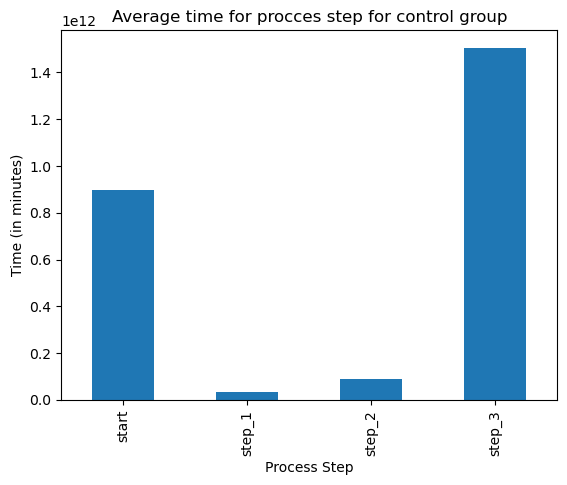

In [94]:
steps_mean_control.plot(kind='bar')
plt.xlabel('Process Step')
plt.ylabel('Time (in minutes)')
plt.title('Average time for procces step for control group')

Our solution was to create a new dataframe with the same information, and then later manually set the values for the y-axis. This solution worked as shown below and we can better understand the average time per process step for each group.

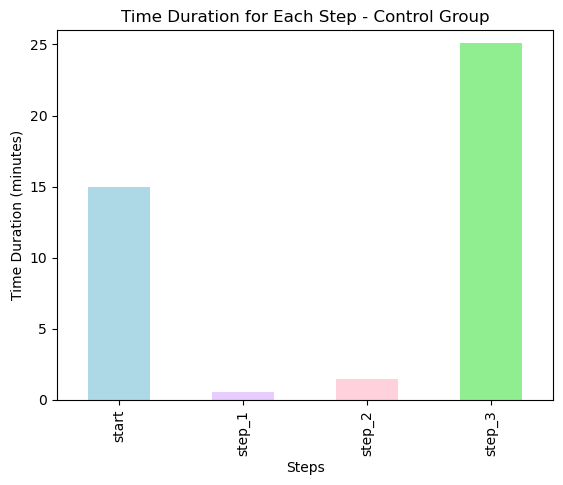

In [95]:
data = pd.Series([pd.Timedelta('0 days 00:14:59.401621934'),
                  pd.Timedelta('0 days 00:00:34.029359271'),
                  pd.Timedelta('0 days 00:01:27.175144941'),
                  pd.Timedelta('0 days 00:25:05.294793161')],
                 index=['start', 'step_1', 'step_2', 'step_3'])

# Convert time durations to minutes
data_minutes = data.dt.total_seconds() / 60

colors = ['#ADD8E6', '#E6CCFF', '#FFD1DC', '#90EE90']

data_minutes.plot.bar(color=colors)


plt.xlabel('Steps')
plt.ylabel('Time Duration (minutes)')
plt.title('Time Duration for Each Step - Control Group')

# Set the y-axis limits
plt.ylim(0, 26)

plt.show()

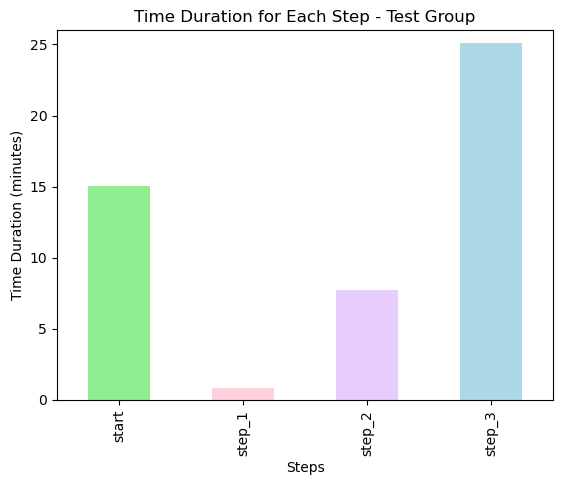

In [96]:
data = pd.Series([pd.Timedelta('0 days 00:15:03.846748440'),
                  pd.Timedelta('0 days 00:00:48.226330451'),
                  pd.Timedelta('0 days 00:07:42.580510383'),
                  pd.Timedelta('0 days 00:25:04.896828408')],
                 index=['start', 'step_1', 'step_2', 'step_3'])

# Convert time durations to minutes
data_minutes = data.dt.total_seconds() / 60

colors = ['#90EE90', '#FFD1DC', '#E6CCFF', '#ADD8E6']

data_minutes.plot.bar(color=colors)



plt.xlabel('Steps')
plt.ylabel('Time Duration (minutes)')
plt.title('Time Duration for Each Step - Test Group')

# Set the y-axis limits
plt.ylim(0, 26)


plt.show()